# 유방암 데이터 (load_breast_cancer)
- feature 갯수를 10, 5, 2로 차원 축소
- 각각의 경우(30, 10, 5, 2) 분류 성능 측정
- 2개로 차원 축소 후 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## feature 갯수를 10, 5, 2로 차원 축소

In [3]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
std_data = scaler.fit_transform(dataset.data)

In [4]:
# 차원축소
from sklearn.decomposition import PCA

dims = [10, 5, 2]

for dim in dims:
    globals()['pca{}'.format(dim)] = PCA(n_components=dim)
    globals()['pca{}_data'.format(dim)] = globals()['pca{}'.format(dim)].fit_transform(std_data)

    data = globals()['pca{}_data'.format(dim)]
    columns = ['PC{}'.format(k) for k in np.arange(1, dim+1)]
    globals()['pca{}_df'.format(dim)] = pd.DataFrame(data=data, columns=columns)
    globals()['pca{}_df'.format(dim)]['target'] = dataset.target

## 각각의 경우(30, 10, 5, 2) 분류 성능 측정

In [5]:
# 성능 측정
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dims = [30, 10, 5, 2]

for dim in dims:

    if dim == 30:
        X_data = dataset.data
        y_data = dataset.target
    else:
        df = globals()['pca{}_df'.format(dim)]
        X_data = df.loc[:, df.columns != 'target'].to_numpy()
        y_data = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, stratify=y_data, test_size=0.3, random_state=2021
    )

    dtc = DecisionTreeClassifier(random_state=2021)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    score = accuracy_score(y_test, pred)

    print('{0}차원-accuracy_score: {1:.4f}'.format(dim, score))

30차원-accuracy_score: 0.9181
10차원-accuracy_score: 0.9532
5차원-accuracy_score: 0.9298
2차원-accuracy_score: 0.9181


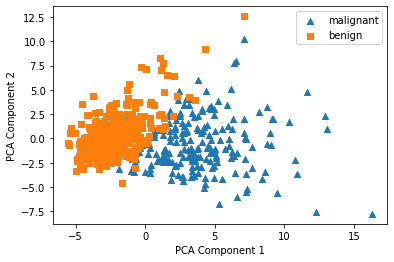

In [6]:
# 시각화
df = pca2_df.copy(deep=True)
markers=['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target'] == i]['PC1']
    y_axis_data = df[df['target'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=dataset.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()